## Self study 4

In this self study we implement pagerank, and test it on some real graphs.

In [2]:
import numpy as np
import networkx as nx
import pandas as pd

We are using a social network consisting of 71 lawyers (cf. slide 4, lecture 4). A description of the network and the original data can be found here:

https://www.stats.ox.ac.uk/~snijders/siena/Lazega_lawyers_data.htm

Of the three different relationships included in the data we will only be using the 'friendship' relation. This is a directed relationship, i.e., friends(a,b) does not necessarily imply friends(b,a) according to the data.

We load a version of the Lazega network data that only contains the 'friends' edges:

In [9]:
lazega=nx.readwrite.graphml.read_graphml('lazega.gml')

The nodes in the graph have the attributes "Practice" "Age" "Seniority" "Office" "Gender" "Status" . To obtain a dictionary with the values for a specified attribute for all nodes, we can use:

In [10]:
nx.get_node_attributes(lazega,'Office')

{'1': 1,
 '2': 1,
 '4': 1,
 '8': 1,
 '17': 1,
 '16': 1,
 '22': 1,
 '26': 1,
 '3': 2,
 '9': 1,
 '11': 1,
 '12': 1,
 '14': 2,
 '19': 1,
 '21': 1,
 '23': 1,
 '27': 1,
 '29': 1,
 '5': 2,
 '7': 2,
 '18': 2,
 '25': 2,
 '24': 1,
 '10': 1,
 '13': 1,
 '34': 1,
 '38': 1,
 '15': 3,
 '20': 1,
 '41': 1,
 '43': 1,
 '52': 1,
 '6': 2,
 '28': 2,
 '50': 2,
 '37': 3,
 '32': 2,
 '39': 1,
 '40': 1,
 '31': 2,
 '33': 2,
 '35': 2,
 '51': 2,
 '58': 2,
 '46': 2,
 '60': 1,
 '36': 1,
 '57': 1,
 '30': 2,
 '42': 1,
 '54': 1,
 '56': 1,
 '48': 1,
 '49': 1,
 '64': 1,
 '45': 1,
 '55': 1,
 '65': 1,
 '62': 1,
 '59': 2,
 '53': 1,
 '61': 1,
 '63': 2,
 '66': 1,
 '69': 1,
 '70': 1,
 '71': 1,
 '68': 1,
 '67': 1}

The following is a little helper function that returns an array of attribute values of nodes according to the order in which nodes are returned by the G.nodes() function

In [11]:
def get_att_array(G,att_name):
    ret_array=np.zeros(nx.number_of_nodes(G))
    for i,n in enumerate(G.nodes()):
        ret_array[i]=G.nodes[n][att_name]
    return(ret_array)

We can use this to plot the graph using the Kamada Kawai layout algorithm, and nodes colored according to the Office attribute:

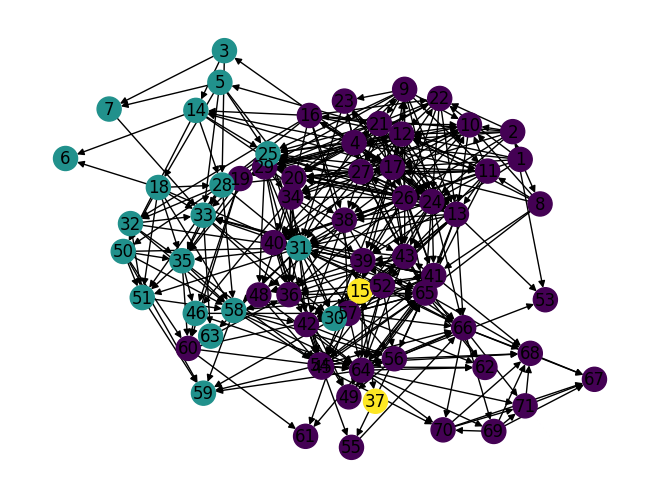

In [14]:
nx.draw_kamada_kawai(lazega,with_labels=True,node_color=get_att_array(lazega,'Office'))

**Task 1:** Implement the computation of PageRank on the Lazega graph (or on any NetworkX graph in general -- this makes no real difference). At the end, each node should have an additional attribute 'PR' whose value is equal to the PageRank of the node.

Some useful functions: to set an attribute value for a single node, one can use (a bit counterintuitively) the add_node function:

In [73]:
#lazega.add_node(3,PR=0.29)

#nx.get_node_attributes(lazega,'PR')

To set an attribute for all nodes, one can use the set_node_attributes functions, which takes a dictionary of node:value pairs to define the attribute:


In [15]:
newatt = {}
newatt['3']={'newatt':0.8}
newatt['15']={'newatt':1.2}

nx.set_node_attributes(lazega,newatt)
nx.get_node_attributes(lazega,'newatt')

{'3': 0.8, '15': 1.2}

To get all the neighbors of a node reachable by outgoing edges, we can use:

In [16]:
nodes = ('5')
for e in nx.edges(lazega, nbunch=nodes):
    print(e)

('5', '7')
('5', '18')
('5', '25')
('5', '20')
('5', '33')


In [4]:
lazega=nx.readwrite.graphml.read_graphml('lazega.gml')
maxNodes = nx.number_of_nodes(lazega) + 2 # 71 nodes total as per the figure
MarkovChain = [[0 for _ in range(maxNodes)] for _ in range(maxNodes)]
ProbabilityDistribution = [1/maxNodes for _ in range(maxNodes)]
Iterations = [ProbabilityDistribution]

def initMarkovChain(markovChain):
    for i,node in enumerate(nx.nodes(lazega)):
        out_degree = [e[1] for e in nx.edges(lazega, nbunch=node)] # ('1', '2') --> 2
        #print(node, out_degree)
        if len(out_degree) == 0: continue
        probability = 1/len(out_degree)
        for o in out_degree:
            markovChain[i][int(o)-1] = probability
    return markovChain

def showMarkovChain(markovChain, show="", max=maxNodes):
    i=0
    print("Markov Chain:")
    if(show == "sum"):
        for row in markovChain:
            print(round(sum(row),2), row)
            if(i==max-1): break
            i+=1
    else:

        for row in markovChain:
            print(row)
            if(i==max-1): break
            i+=1


def showHistory(iterations):
    for i in range(len(iterations)):
        print(f"Iteration {i}: sum {sum(iterations[i])}, {iterations[i]}")

def doIteration(i):
    for x in range(len(ProbabilityDistribution)):
       col = df_MarkovChain.iloc[:, x]
       Iterations[i][x] = sum(col*ProbabilityDistribution[x])

MarkovChain = initMarkovChain(MarkovChain)
df_MarkovChain = pd.DataFrame(MarkovChain, dtype=float)

iters = 20
for i in range(1, iters+1):
    Iterations.append([0 for _ in range(maxNodes)])
    doIteration(i)

showHistory(Iterations)
#showMarkovChain(MarkovChain, show="sum") #show="sum", max=3



Iteration 0: sum 1.0, [0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.0140845

**Task 2** The definition of PageRank depends on the parameter 'alpha' that determines the relative weight of the 'teleportation' transitions (random restart of the random walk at an arbitrary node). Try your PR computations with different settings of 'alpha' and compare the results.

In [3]:
import random

alpha = 0.1 # 0 < alpha < 1

for i, row in enumerate(MarkovChain):
    if sum(row) == 0:
        MarkovChain[i] = [1/maxNodes for _ in range(maxNodes)]
    elif 1 - alpha >= random.uniform(0, 1):
        MarkovChain[i] = [1/maxNodes for _ in range(maxNodes)]
df_MarkovChain = pd.DataFrame(MarkovChain, dtype=float)

iters = 20
for i in range(1, iters+1):
    lst = [0 for _ in range(maxNodes)]
    Iterations.append(lst)
    doIteration(i)

showHistory(Iterations)
showMarkovChain(MarkovChain, show="sum") #show="sum", max=3


Iteration 0: sum 1.0, [0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.0140845

**Task 3** What happens when you drop the directions of the edges? Verify that now the PageRank reduces to the degree centrality of nodes.

To obtain an undirected version, you can use:

In [167]:
u_lazega=lazega.to_undirected()

**Task 4** To face a somewhat bigger challenge, use the Stanford web graph you can download from http://snap.stanford.edu/data/web-Stanford.html Does your implementation scale to this size of graph?

You can read the web-Stanford.txt file using:

In [ ]:
stanford=nx.read_edgelist('web-Stanford.txt',nodetype=int,create_using=nx.DiGraph()) 